# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

# This file contains code and write up for Sign Classification

---
## Step 0: Load The Data

Import all modules required in this file first

In [10]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.utils import shuffle
import cv2
import tensorflow as tf
from numpy import newaxis
from sklearn.cross_validation import train_test_split
import tensorflow as tf
from tensorflow.contrib.layers import flatten
import os
import matplotlib.image as mpimg
import skimage.transform
%matplotlib inline

Load data from saved folder. 

Here data is marked original (X_train_orig) because later it will be pre-processed and treated as
X_train and X_test

X_train_orig is also split into training and validation sets

In [13]:
# Load pickled data

training_file = './traffic-signs-data/train.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train_orig, y_train_orig = train['features'], train['labels']
X_test_orig, y_test_orig = test['features'], test['labels']


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

This cell shows summary of datasets.

There are 39209 training data and 12630 test images. They are all classified into 43 different classes

In [14]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train_orig.shape[0]

# TODO: Number of testing examples.
n_test = X_test_orig.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train_orig[0].shape

# TODO: How many unique classes/labels there are in the dataset.
label_df = pd.DataFrame(y_train_orig)
n_classes = label_df[0].nunique()

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

43 classes are stored in a file: signnames.csv

Here we plot:
1) names and class ids stored in the file names
2) How many images in training set belong to which of the 43 classes

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


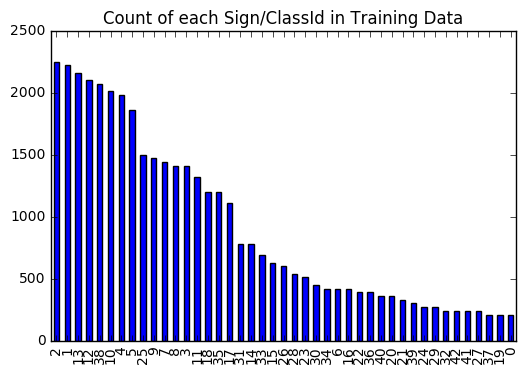

In [15]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
plt.figure();

#Plot count of each ClassId in the label training set
label_df[0].value_counts().plot(kind='bar')
plt.title('Count of each Sign/ClassId in Training Data') 
df = pd.read_csv('./signnames.csv')
df



In [16]:
Here we display 10 random images from Training data and also plot its associated class and class id

The visuals help to make sure our training data and labels relationship after reading from different files are still valid and we are ready to process further

Note: Since we are using random 10 images, there will be different images each time this notebook is run

SyntaxError: invalid syntax (<ipython-input-16-177a512e8bd3>, line 1)



Display:  Image, ClassId and its Classification for 10 random images from Training Set




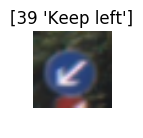

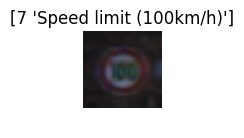

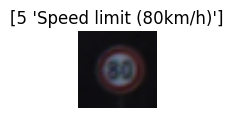

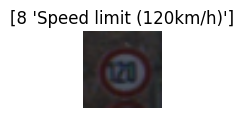

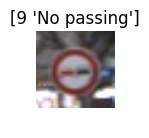

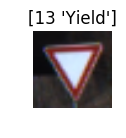

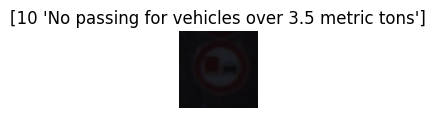

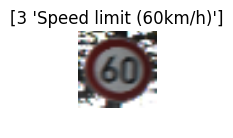

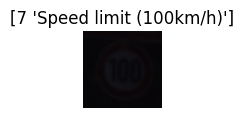

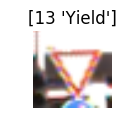

In [17]:
# Get 10 random index from Training data
randomIdx = random.sample(range(0, len(X_train_orig)), 10)
# Convert Pandas df to numpy array for plotting labels
nparr=df.iloc[:,:].values
cnt=0
labels=[]
filedict ={}
print("\n\nDisplay:  Image, ClassId and its Classification for 10 random images from Training Set\n\n")
for i in randomIdx:
    plt.figure(figsize=(1,1))
    image = X_train_orig[i].squeeze()
    plt.imshow(image, cmap="gray")
    plt.axis('off')
    plt.title('{}'.format(nparr[y_train_orig[i]])) 


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Pre-process data set 

1) Equilize the y channel in YUV color space
     - Convert it back to RGB color space after equilize
2) Covert to Gray
3) Normalize by dividing by 255

Apply this pre-processing to both Training and Testing images

Check the Count & Shape of the image after pre-processing has been applied to both Training/Testing


In [19]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
def convert2Gray(data):
    gray_images = []   
    for image in data:       
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray_images.append(gray)        
    return np.array(gray_images)


def scaleX(X):
    X = (X/255)
    return X


def equalizeHistogram(data):    
    equalize_images = []
    
    for img in data:      
        img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
        # equalize the histogram of the Y channel
        img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
        # convert the YUV image back to RGB format
        img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
        equalize_images.append(img_output)
    return np.array(equalize_images)


def preprocess(data): 
    X_equlizedHistOfColorImage = equalizeHistogram(data)
    X_train_gray = convert2Gray(X_equlizedHistOfColorImage)
    X_scale = scaleX(X_train_gray)
    X_train_grayaxis = X_scale[..., newaxis]
    return(X_train_grayaxis)

print("Before: train dims=", X_train_orig.shape)  
print("Before: test dims=", X_test_orig.shape) 
print("Before: y dims=", y_train_orig.shape) 

X_train_preprocessed = preprocess(X_train_orig)
X_test_preprocessed  = preprocess(X_test_orig)
X_train, y_train     = shuffle(X_train_preprocessed, y_train_orig)
X_test, y_test       = shuffle(X_test_preprocessed, y_test_orig)

print("")
print("After: preprocess train=", X_train.shape)
print("After: preprocess test=", X_test.shape)
print("After: y=", y_train.shape)

Before: train dims= (39209, 32, 32, 3)
Before: test dims= (12630, 32, 32, 3)
Before: y dims= (39209,)

After: preprocess train= (39209, 32, 32, 1)
After: preprocess test= (12630, 32, 32, 1)
After: y= (39209,)


### Split Data into Training, Validation and Testing Sets

Split the training data into Training and Validation using 80/20 split

Check the Counts and Shape after the split

Note: Test images remain as is in this step

In [20]:
### Split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

# Split training set into 80/20 
X_training, X_validation, y_training, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print ("size of Original train=", X_train.shape)
print("")
print ("size of new train=", X_training.shape)
print ("size of validation=", X_validation.shape)
print ("size of test=", X_test_preprocessed.shape)

size of Original train= (39209, 32, 32, 1)

size of new train= (31367, 32, 32, 1)
size of validation= (7842, 32, 32, 1)
size of test= (12630, 32, 32, 1)


In [21]:
# Set # of Epochs and batch size for the model
EPOCHS = 10
BATCH_SIZE = 256

### Model Architecture

Here i am selecting LeNet model that was presented in the class. With initial experiments i had got ~97% accuracy with this model. However there are more advanced models available that could provide better results. I wanted to see how much accuracy we can get with
basic model and as an advanced step (if time permits) try with different Models (VGG, Inception etc)

Model:

Layer 1: ConNet -> ReLU -> MaxPool
Layer 2: ConNet -> ReLU -> MaxPool
Layer 3: Flatten
Layer 4: Fully Connected -> ReLU
Layer 5: Fully Connected -> ReLU

Adam Optimizer with learning rate of 0.003


In [24]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 200), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(200))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(200, 100), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(100))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(100, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [27]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [28]:
rate = 0.003

logits             = LeNet(x)
cross_entropy      = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation     = tf.reduce_mean(cross_entropy)
optimizer          = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [29]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
#saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

Run the model defined earlier for 10 Epochs and save the model results in file

To Test, model will be restored from this file

In [30]:
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_training)

    print("Training...", num_examples)
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_training, y_training)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            #print("offset=",offset, " end=", end)
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            #print("x=",batch_x, " y=", batch_y)
            
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    saveToFile = 'trafficSign_model.ckpt'
    saver = tf.train.Saver()        
    saver.save(sess,saveToFile)
    print("Model saved")

Training... 31367

EPOCH 1 ...
Validation Accuracy = 0.804

EPOCH 2 ...
Validation Accuracy = 0.898

EPOCH 3 ...
Validation Accuracy = 0.948

EPOCH 4 ...
Validation Accuracy = 0.953

EPOCH 5 ...
Validation Accuracy = 0.965

EPOCH 6 ...
Validation Accuracy = 0.966

EPOCH 7 ...
Validation Accuracy = 0.970

EPOCH 8 ...
Validation Accuracy = 0.973

EPOCH 9 ...
Validation Accuracy = 0.979

EPOCH 10 ...
Validation Accuracy = 0.973

Model saved


After training and getting 97% accuracy on validation set, the Test Images i only get ~90% accuracy

This will impact on predicting new images accurately.

In [31]:
# Test Accuracy on Test Set

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.904


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

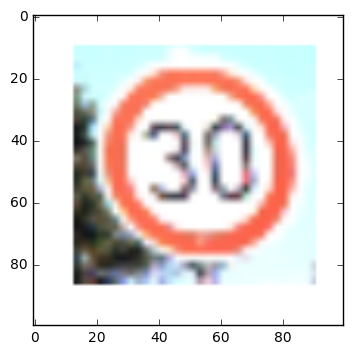

(100, 100, 4)
shape: (100, 100, 4), min: 0.07058823853731155, max: 1.0
label: none


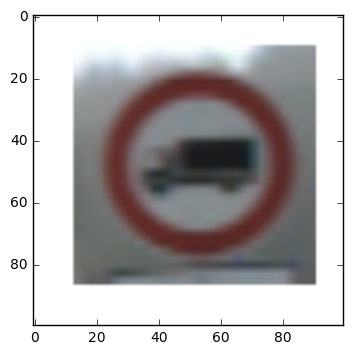

(100, 100, 4)
shape: (100, 100, 4), min: 0.08627451211214066, max: 1.0
label: none


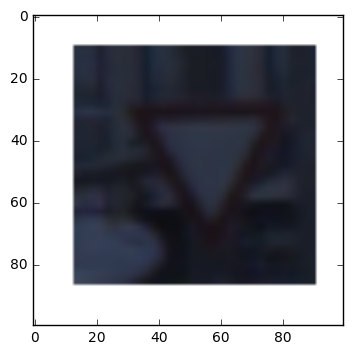

(100, 100, 4)
shape: (100, 100, 4), min: 0.05098039284348488, max: 1.0
label: none


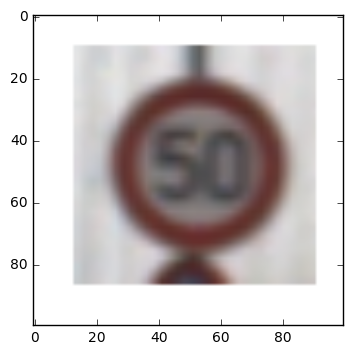

(100, 100, 4)
shape: (100, 100, 4), min: 0.15294118225574493, max: 1.0
label: none


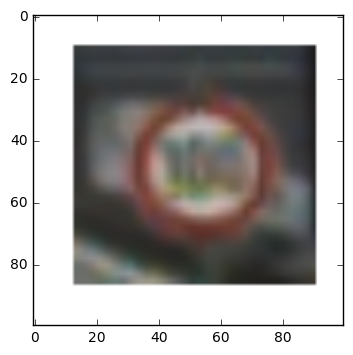

(100, 100, 4)
shape: (100, 100, 4), min: 0.10588235408067703, max: 1.0
label: none


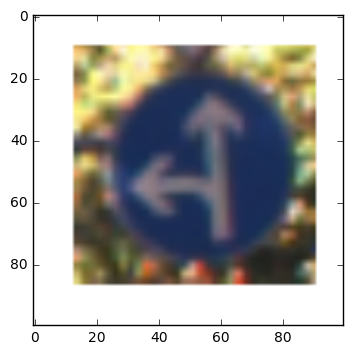

(100, 100, 4)
shape: (100, 100, 4), min: 0.08235294371843338, max: 1.0
label: none


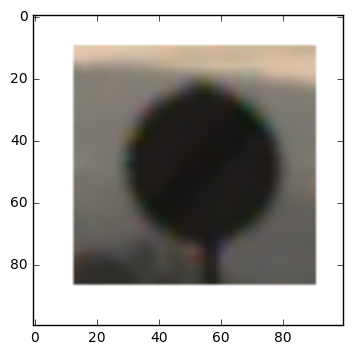

(100, 100, 4)
shape: (100, 100, 4), min: 0.04313725605607033, max: 1.0
label: none


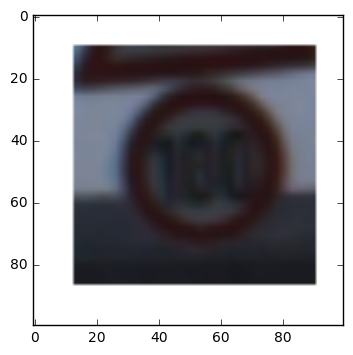

(100, 100, 4)
shape: (100, 100, 4), min: 0.062745101749897, max: 1.0
label: none


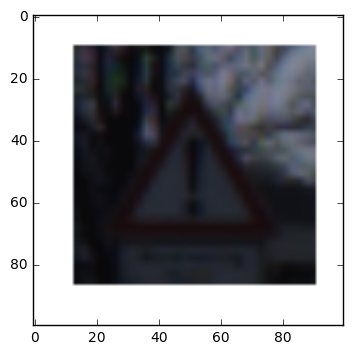

(100, 100, 4)
shape: (100, 100, 4), min: 0.027450980618596077, max: 1.0
label: none


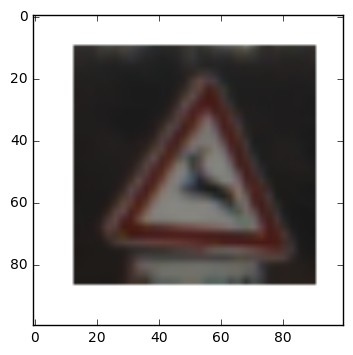

(100, 100, 4)
shape: (100, 100, 4), min: 0.06666667014360428, max: 1.0
label: none


In [51]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

img2test = os.listdir("uvs/")
img2test = img2test[1:11]

    
# Show the images, add to a list to process for classifying
origImages = []  
for img in img2test:
    i = 'uvs/' + img
    image = mpimg.imread(i)
    fname = 'uvs/' + os.path.splitext(img)[0]
    origImages.append(image)
    plt.imshow(image)
    plt.show()
    print(image.shape)
    print("shape: {0}, min: {1}, max: {2}".format(image.shape, image.min(), image.max()))
    print("label:", filedict.get(fname,'none'))

In [52]:
# Real world test
# Preprocess the images used for prediction
# This will be fed as an input to our model


# Convert image scaled values of 0 to 0.99 to original values
def convert2Normal(img):
    unscaledValues = []
    unscaledValues = np.ceil( 255*np.array(img))
    unscaledValues = unscaledValues.astype(np.uint8) #very important else CVT fn will not convert
    return unscaledValues


# Note resize will return single channel
def resizeEachImg32(img):
    height = 32
    width = 32
    gray = skimage.transform.resize(img, (height, width))
    return gray


def resizeAllImgs(data):  
    fixedSizeImages = []
    for image in data:
        #print("orig: {0}, min: {1}, max: {2}".format(image.shape, image.min(), image.max()))
        resized = resizeEachImg32(image)
        normal = convert2Normal(resized)
        fixedSizeImages.append(normal)
    return fixedSizeImages


# First, double-check the image shape to make sure it matches the original data's 32x32x3 size
resizedImages         = resizeAllImgs(origImages)   
processedImgs2Predict = preprocess(resizedImages)

# Read the Labels for these images in pandas data frame
df3 = pd.read_csv('./predictids.csv')


for i in origImages:
    print("orig test img shape: {0}, min: {1}, max: {2}".format(i.shape, i.min(), i.max()))

print("----**********-----------")
for i in resizedImages:  
    print("after resize shape: {0}, min: {1}, max: {2}".format(i.shape, i.min(), i.max()))


print("----**********-----------")
for i in processedImgs2Predict:
    print("after pre-process shape: {0}, min: {1}, max: {2}".format( i.shape, i.min(), i.max()))




print("\nReady to test the model from raw images ..")

orig test img shape: (100, 100, 4), min: 0.07058823853731155, max: 1.0
orig test img shape: (100, 100, 4), min: 0.08627451211214066, max: 1.0
orig test img shape: (100, 100, 4), min: 0.05098039284348488, max: 1.0
orig test img shape: (100, 100, 4), min: 0.15294118225574493, max: 1.0
orig test img shape: (100, 100, 4), min: 0.10588235408067703, max: 1.0
orig test img shape: (100, 100, 4), min: 0.08235294371843338, max: 1.0
orig test img shape: (100, 100, 4), min: 0.04313725605607033, max: 1.0
orig test img shape: (100, 100, 4), min: 0.062745101749897, max: 1.0
orig test img shape: (100, 100, 4), min: 0.027450980618596077, max: 1.0
orig test img shape: (100, 100, 4), min: 0.06666667014360428, max: 1.0
----**********-----------
after resize shape: (32, 32, 4), min: 21, max: 255
after resize shape: (32, 32, 4), min: 24, max: 255
after resize shape: (32, 32, 4), min: 15, max: 255
after resize shape: (32, 32, 4), min: 40, max: 255
after resize shape: (32, 32, 4), min: 31, max: 255
after resi

In [53]:
# Tensorboard for debug

#file_writer = tf.summary.FileWriter('mygraph', sess.graph)
#!tensorboard --logdir=mygraph  

### Predict the Sign Type for Each Image

In [54]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
# Make into numpy array for processing


### Run the predictions here.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('trafficSign_model.ckpt.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('./'))
    print("Model restored.") 

    pred_val               = tf.argmax(logits, 1)
    pred_softmax           = tf.nn.softmax(logits)
    pred_topFive           = tf.nn.top_k(pred_softmax, k=5)

    new_pics_classes,top5  = sess.run([pred_val, pred_topFive], feed_dict={x: processedImgs2Predict})
    

Model restored.


In [ ]:
Restore the model created earlier

### Analyze Performance

In [ ]:
Print Softmax Probabilities and Plot comparison chart

For Each image 

- It shows what are the top 5 probabilities
- What are the corresponding classes for each probabilities
- Chart showing the probabilties

It plots for all 10 images required to predict from the saved model


Predicted Classes for all new images:  [ 1 16 13 15 15 37  3 15 18  2]



a) Image: 0


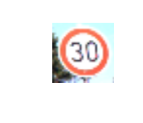

b) Predicted probabilities: [  9.98688400e-01   1.31122267e-03   2.31798722e-07   9.90349989e-08
   1.85592611e-10]
c) Predicted classes: [ 1  0 10  4 40]
d) Predicted classid by model= 1
e) Actual classid & desc of image= [1 'Speed limit (30km/h)' 'image_1.png ']


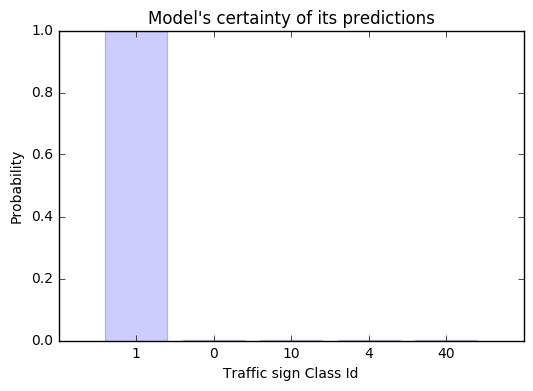


a) Image: 1


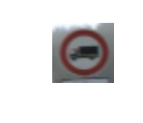

b) Predicted probabilities: [  6.17460012e-01   3.82384002e-01   5.22140763e-05   4.94440683e-05
   3.85720195e-05]
c) Predicted classes: [16  9  3 10 12]
d) Predicted classid by model= 16
e) Actual classid & desc of image= [16 'Vehicles over 3.5 metric tons prohibited' 'image_10.png ']


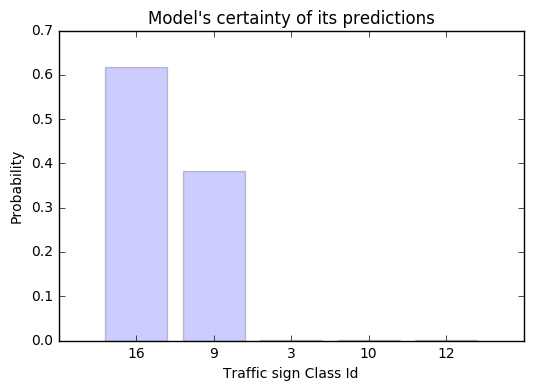


a) Image: 2


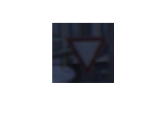

b) Predicted probabilities: [  9.47636724e-01   3.96279879e-02   9.07655712e-03   1.96736678e-03
   6.37034886e-04]
c) Predicted classes: [13  9 33 14 15]
d) Predicted classid by model= 13
e) Actual classid & desc of image= [13 'Yield' 'image_2.png ']


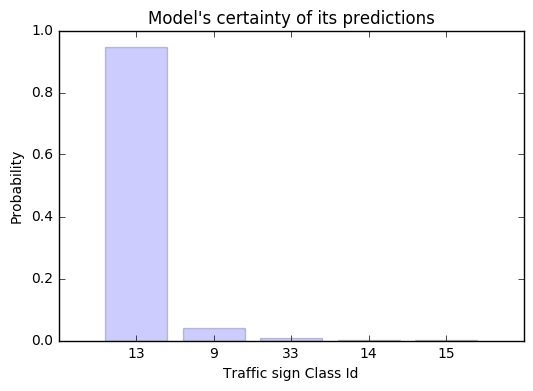


a) Image: 3


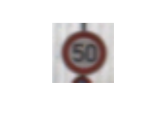

b) Predicted probabilities: [ 0.53592926  0.17976497  0.07885114  0.05553599  0.05164071]
c) Predicted classes: [15 14  5  3  2]
d) Predicted classid by model= 15
e) Actual classid & desc of image= [2 'Speed limit (50km/h)' 'image_3.png ']


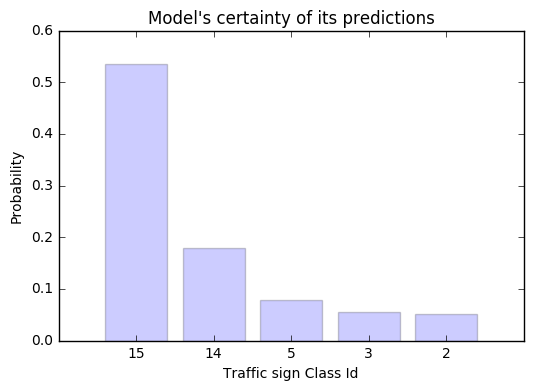


a) Image: 4


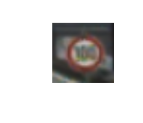

b) Predicted probabilities: [ 0.97948235  0.00897397  0.00625813  0.0014177   0.00127159]
c) Predicted classes: [15  9 14 38 13]
d) Predicted classid by model= 15
e) Actual classid & desc of image= [7 'Speed limit (100km/h)' 'image_4.png ']


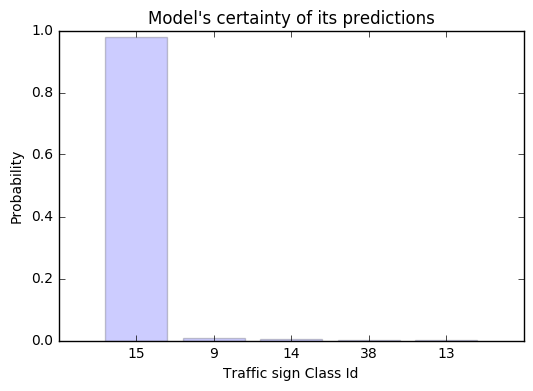


a) Image: 5


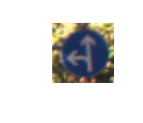

b) Predicted probabilities: [ 0.91299778  0.07492895  0.00459407  0.00273162  0.00214778]
c) Predicted classes: [37 39 22 14 31]
d) Predicted classid by model= 37
e) Actual classid & desc of image= [37 'Go straight or left' 'image_5.png ']


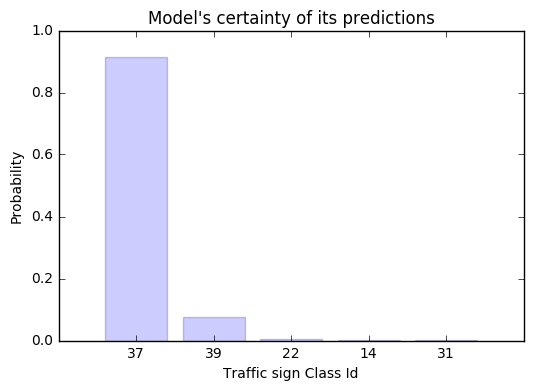


a) Image: 6


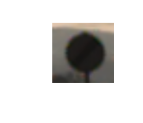

b) Predicted probabilities: [ 0.87460029  0.03995825  0.03140726  0.01838903  0.01296781]
c) Predicted classes: [ 3  5  1  2 38]
d) Predicted classid by model= 3
e) Actual classid & desc of image= [32 'End of all speed and passing limits' 'image_6.png ']


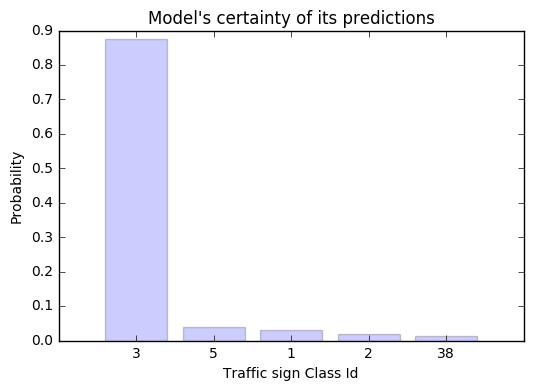


a) Image: 7


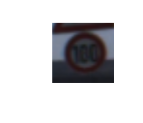

b) Predicted probabilities: [ 0.49334079  0.34546068  0.05039109  0.04791549  0.01905253]
c) Predicted classes: [15 39 14  2  8]
d) Predicted classid by model= 15
e) Actual classid & desc of image= [7 'Speed limit (100km/h)' 'image_7.png ']


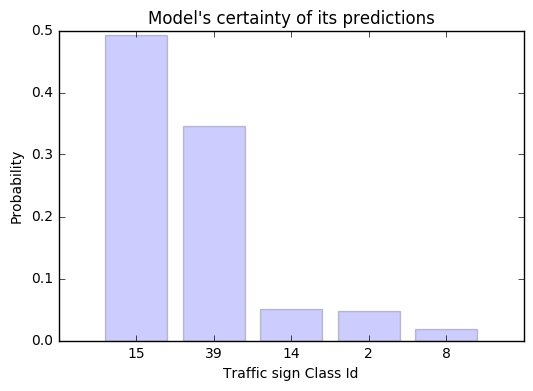


a) Image: 8


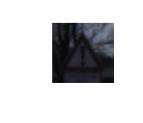

b) Predicted probabilities: [ 0.938577    0.02392931  0.02243846  0.00544296  0.00226436]
c) Predicted classes: [18 37 25 39 26]
d) Predicted classid by model= 18
e) Actual classid & desc of image= [18 'General caution' 'image_8.png ']


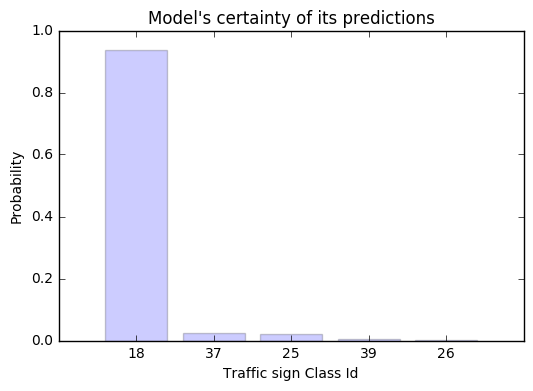


a) Image: 9


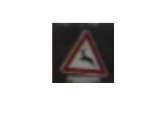

b) Predicted probabilities: [ 0.54553479  0.30590904  0.07807384  0.04237458  0.00660268]
c) Predicted classes: [ 2 39 37 31  1]
d) Predicted classid by model= 2
e) Actual classid & desc of image= [31 'Wild animals crossing' 'image_9.png ']


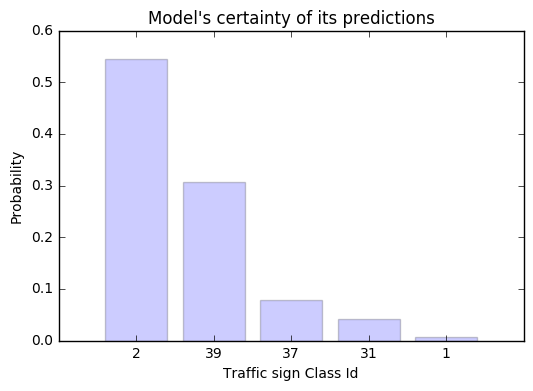

In [59]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
#tf.reset_default_graph()

print('\nPredicted Classes for all new images: ', new_pics_classes)
print("\n")

nparr2=df3.iloc[:,:].values
wrong_prediction_cnt=0
def plot_probability(probabilities, labels):
    """Plot model's probabilities (y) and traffic sign labels (x) 
    in a bar chart.
    """
    y_pos = np.arange(len(labels))
    plt.bar(y_pos, probabilities, align='center', alpha=0.2)
    plt.xticks(y_pos, labels)
    plt.ylabel('Probability')
    plt.xlabel('Traffic sign Class Id')
    plt.title('Model\'s certainty of its predictions')
    plt.show()


for idx, val in enumerate(new_pics_classes):
    img = origImages[idx]
    predicted_class = new_pics_classes[idx]
    actual_class = nparr2[idx]
    classid = actual_class[0]
    
    if(predicted_class != classid):
        wrong_prediction_cnt = wrong_prediction_cnt + 1 
        
    print('\na) Image:', idx)
    plt.figure(figsize=(1,1))
    plt.axis('off')
    plt.imshow(img)
    plt.show()
    print('b) Predicted probabilities:', top5[0][idx])
    print('c) Predicted classes:', top5[1][idx])
    print("d) Predicted classid by model=" , predicted_class)
    print("e) Actual classid & desc of image=" , actual_class)
    plot_probability(top5[0][idx],top5[1][idx])


    

In [56]:
total=idx+1
print("\nModel Prediction accuracy = ","{:.2%}".format(1-(wrong_prediction_cnt/total)))



Model Prediction accuracy =  50.00%


# Final prediction on 10 images: 50% accuracy

Training model acuracy: 97%
    
Test accuracy: 90%
    
I think better pre-processing with augmentation, changing gradient or applying thresholding might result in better accuracy.

Also a different model approach could have led to better results.


> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 